# 🧬 DenseNet Exploration Notebook

Welcome!  This notebook re‑creates all the learning experiments you did
with **LeNet** – but for **DenseNet**.  We reuse your existing
`densenet.py` model definitions and the training helper
`train_densenet.py` so you can focus on experimentation rather than
boilerplate.


## Setup

In [1]:
# Uncomment on first run
# !pip install --quiet torch torchvision matplotlib tqdm

# Add parent directory to Python path so we can import the train module
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from train import run_densenet_training  # 👈 your helper
from itertools import product
import json, time, pathlib, matplotlib.pyplot as plt


## 1️⃣  Baseline: lightweight CIFAR‑DenseNet

In [3]:
history_light = run_densenet_training(
    model_type='densenetcustom',   # lightweight variant
    epochs=100,
    train_batch_size=256,
    test_batch_size=256,
    lr=0.1,
    optimiser='sgd',
)


[DenseNet] Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
[DenseNet] Initialized densenetcustom model with 754,162 parameters

=== Epoch 1 ===
[25600/50000] loss: 1.6364
Val loss: 1.5371, Acc: 50.46%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenetcustom_best.pth

=== Epoch 2 ===
[25600/50000] loss: 0.9832
Val loss: 1.1606, Acc: 62.54%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenetcustom_best.pth

=== Epoch 3 ===
[25600/50000] loss: 0.7741
Val loss: 0.9678, Acc: 69.03%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenetcustom_best.pth

=== Epoch 4 ===
[25600/50000] loss: 0.6328
Val loss: 0.9012, Acc: 70.87%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenetcustom_best.pth

=== Epoch 5 ===
[25600/50000] loss: 0.5510
Val loss: 0.8882, Acc: 73.

c:\Users\scxhw3\repositories\PyTorch_Learning\train\train_densenet.py:226: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_path))


### Learning curves (lightweight)

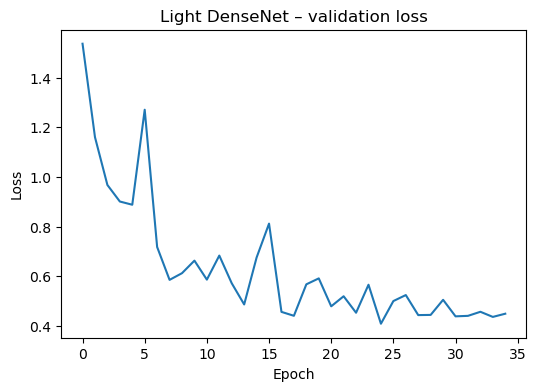

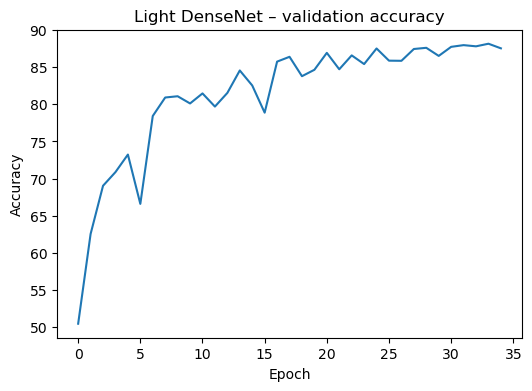

In [4]:
val_loss, val_acc = zip(*history_light)
plt.figure(figsize=(6,4))
plt.plot(val_loss); plt.title('Light DenseNet – validation loss');
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.show()

plt.figure(figsize=(6,4))
plt.plot(val_acc); plt.title('Light DenseNet – validation accuracy');
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.show()


## 2️⃣  Baseline: full DenseNet‑121

In [5]:
history_121 = run_densenet_training(
    model_type='densenet121',
    epochs=100,
    train_batch_size=128,
    test_batch_size=256,
    lr=0.1,
    optimiser='sgd',
)


[DenseNet] Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
[DenseNet] Initialized densenet121 model with 6,962,058 parameters

=== Epoch 1 ===
[12800/50000] loss: 3.3590
[25600/50000] loss: 1.8562
[38400/50000] loss: 1.7048
Val loss: 1.6844, Acc: 42.96%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenet121_best.pth

=== Epoch 2 ===
[12800/50000] loss: 1.5650
[25600/50000] loss: 1.5001
[38400/50000] loss: 1.4730
Val loss: 1.5902, Acc: 49.34%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenet121_best.pth

=== Epoch 3 ===
[12800/50000] loss: 1.3590
[25600/50000] loss: 1.3127
[38400/50000] loss: 1.2694
Val loss: 1.2268, Acc: 57.00%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenet121_best.pth

=== Epoch 4 ===
[12800/50000] loss: 1.1866
[25600/50000] loss: 1.1699
[38400/50000] loss: 1.1298
Val loss:

### Learning curves (DenseNet‑121)

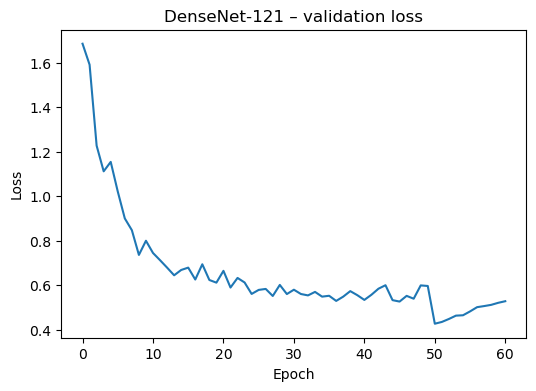

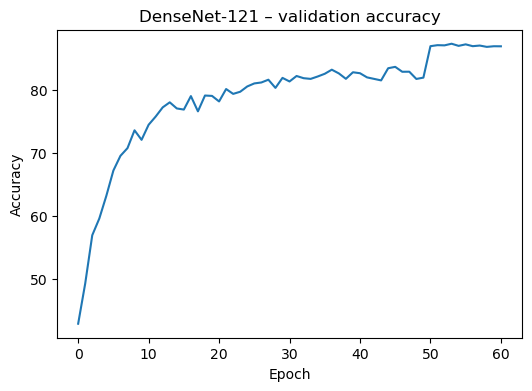

In [6]:
val_loss, val_acc = zip(*history_121)
plt.figure(figsize=(6,4))
plt.plot(val_loss); plt.title('DenseNet‑121 – validation loss');
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.show()

plt.figure(figsize=(6,4))
plt.plot(val_acc); plt.title('DenseNet‑121 – validation accuracy');
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.show()


## 3️⃣  Grid‑search hyper‑parameter sweep

We replicate the grid‑search you performed with LeNet.  The search
space below is small by default so the notebook finishes in a reasonable
time – feel free to expand the lists.

In [7]:
param_grid = {
    'model_type':        ['densenetcustom', 'densenet121'],
    'train_batch_size':  [64, 128],
    'lr':                [0.1, 0.01],
    'optimiser':         ['sgd', 'adam'],
}

search_results = []
run_id = 0

for model_type, bs, lr, opt in product(
        param_grid['model_type'],
        param_grid['train_batch_size'],
        param_grid['lr'],
        param_grid['optimiser']):
    run_id += 1
    print(f"🔍  Run {run_id}: {model_type}, bs={bs}, lr={lr}, opt={opt}")
    hist = run_densenet_training(
        model_type=model_type,
        epochs=50,                        # shorter epochs for search
        train_batch_size=bs,
        test_batch_size=256,
        lr=lr,
        optimiser=opt,
        silent=True,                       # 使用silent参数减少输出
    )
    best_acc = max(acc for _loss, acc in hist)
    search_results.append({
        'model_type': model_type, 'batch_size': bs, 'lr': lr,
        'optimiser': opt, 'best_val_acc': best_acc
    })

print("✅  Grid search complete!")


🔍  Run 1: densenetcustom, bs=64, lr=0.1, opt=sgd
Files already downloaded and verified
Files already downloaded and verified
🔍  Run 2: densenetcustom, bs=64, lr=0.1, opt=adam
Files already downloaded and verified
Files already downloaded and verified
🔍  Run 3: densenetcustom, bs=64, lr=0.01, opt=sgd
Files already downloaded and verified
Files already downloaded and verified
🔍  Run 4: densenetcustom, bs=64, lr=0.01, opt=adam
Files already downloaded and verified
Files already downloaded and verified
🔍  Run 5: densenetcustom, bs=128, lr=0.1, opt=sgd
Files already downloaded and verified
Files already downloaded and verified
🔍  Run 6: densenetcustom, bs=128, lr=0.1, opt=adam
Files already downloaded and verified
Files already downloaded and verified
🔍  Run 7: densenetcustom, bs=128, lr=0.01, opt=sgd
Files already downloaded and verified
Files already downloaded and verified
🔍  Run 8: densenetcustom, bs=128, lr=0.01, opt=adam
Files already downloaded and verified
Files already downloaded a

### Results DataFrame

In [8]:
import pandas as pd
res_df = pd.DataFrame(search_results)
res_df.sort_values('best_val_acc', ascending=False, inplace=True)
res_df.reset_index(drop=True, inplace=True)
res_df


,model_type,batch_size,lr,optimiser,best_val_acc
0,densenetcustom,64,0.10,sgd,92.88
1,densenetcustom,128,0.10,sgd,92.73
2,densenetcustom,64,0.01,sgd,90.38
3,densenetcustom,128,0.01,sgd,88.45
4,densenetcustom,128,0.01,adam,85.90
5,densenet121,64,0.10,sgd,85.70
6,densenet121,64,0.01,sgd,85.45
7,densenet121,128,0.01,sgd,83.58
8,densenetcustom,64,0.01,adam,83.21
9,densenet121,128,0.10,sgd,81.92


### Best configuration

In [9]:
best_cfg = res_df.iloc[0]
print(best_cfg)


model_type      densenetcustom
batch_size                  64
lr                         0.1
optimiser                  sgd
best_val_acc             92.88
Name: 0, dtype: object


## 4️⃣  Train best DenseNet from scratch

In [10]:
history_best = run_densenet_training(
    model_type=best_cfg.model_type,
    epochs=150,
    train_batch_size=int(best_cfg.batch_size),
    test_batch_size=256,
    lr=float(best_cfg.lr),
    optimiser=best_cfg.optimiser,
)


[DenseNet] Using device: cuda
Files already downloaded and verified
Files already downloaded and verified
[DenseNet] Initialized densenetcustom model with 754,162 parameters

=== Epoch 1 ===
[6400/50000] loss: 1.9776
[12800/50000] loss: 1.6669
[19200/50000] loss: 1.5042
[25600/50000] loss: 1.3911
[32000/50000] loss: 1.3168
[38400/50000] loss: 1.1999
[44800/50000] loss: 1.1770
Val loss: 1.7309, Acc: 47.01%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenetcustom_best.pth

=== Epoch 2 ===
[6400/50000] loss: 1.0541
[12800/50000] loss: 0.9880
[19200/50000] loss: 0.9578
[25600/50000] loss: 0.9012
[32000/50000] loss: 0.9116
[38400/50000] loss: 0.8548
[44800/50000] loss: 0.7924
Val loss: 0.8881, Acc: 70.96%
  → loss improved, saved to c:\Users\scxhw3\repositories\PyTorch_Learning\outputs\densenet\densenetcustom_best.pth

=== Epoch 3 ===
[6400/50000] loss: 0.7547
[12800/50000] loss: 0.7336
[19200/50000] loss: 0.7004
[25600/50000] loss: 0.6692
[3

c:\Users\scxhw3\repositories\PyTorch_Learning\train\train_densenet.py:226: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_path))


### Final curves & insights

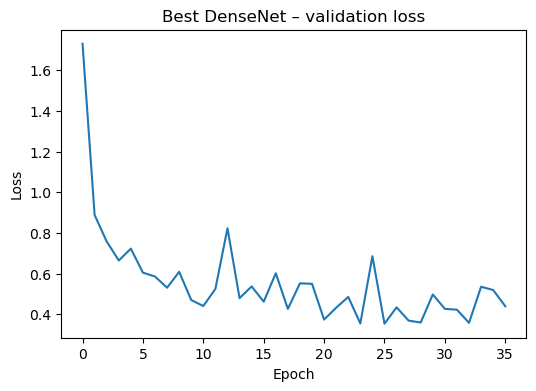

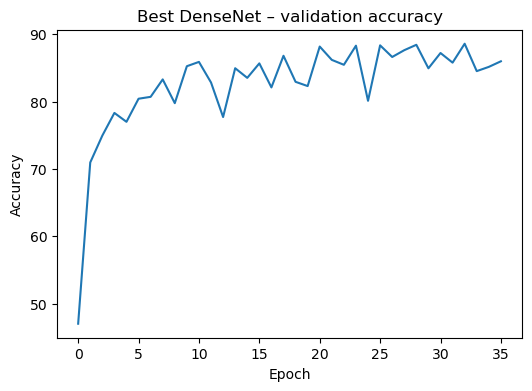

In [11]:
val_loss, val_acc = zip(*history_best)
plt.figure(figsize=(6,4))
plt.plot(val_loss); plt.title('Best DenseNet – validation loss');
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.show()

plt.figure(figsize=(6,4))
plt.plot(val_acc); plt.title('Best DenseNet – validation accuracy');
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.show()


## 5️⃣  Next explorations

* Try **DenseNet‑BC** variants, vary growth‑rate *k* & compression θ.
* Add **cutout / RandAugment** to boost generalisation.
* Replace the classifier with **ArcFace** head for metric learning
  experiments.
* Port the best‑found config onto **Tiny‑Imagenet** to see scaling
  behaviour.
